# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ari ZIddan Nugraha
- **Email:** arizidan.nugraha@gmail.com
- **ID Dicoding:** ariziddan

## Menentukan Pertanyaan Bisnis


- Pada saat musim apa bike riding mendapatkan order terbanyak dalam satu tahun?
- Apakah cuaca mempengaruhi order terhadap bike sharing?

## Import Semua Packages/Library yang Digunakan

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [128]:
df_day = pd.read_csv("/content/drive/MyDrive/submission/data/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [129]:
df_hour = pd.read_csv("/content/drive/MyDrive/submission/data/hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Data yang terdapat pada `day.csv` dan `hour.csv` sama. Perbedaan data tersebut terletak pada presentasi data. Pada data `day.csv`, data dipresentasikan order perhari, sedangkan pada data `hour.csv` data di presentasikan dengan order perjam. Jika dilihat pada pertanyaan bisnis yang saya berikan, maka `day.csv` lebih cocok daripada `hour.csv`. Maka dari itu, saya hanya akan mengolah `day.csv`

In [130]:
df_day = pd.DataFrame(df_day)

### Assessing Data

In [131]:
df_day.duplicated().sum()

0

Tidak ditemukan data yang duplikat

In [132]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [133]:
## Mengubah tipe data pada beberapa kolom menjadi ketagori

columns = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in columns:
    df_day[col] = df_day[col].astype('category')

## Mengubah tipe data pada dteday kolom menjadi date time

df_day['dteday'] = pd.to_datetime(df_day['dteday'])

In [134]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

Tipe data berhasil diubah.

Selanjutnya mengubah nilai pada kolom berdasarkan kriteria yang sudah diberikan pada `readme.txt`

In [135]:
# Konversi nilai untuk kolom 'season' : 1:Winter, 2:Spring, 3:Summer, 4:Fall
df_day.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)

# kolom 'yr' : 0:2011, 1:2012
df_day.yr.replace((0,1), (2011,2012), inplace=True)

# kolom 'mnth' :  1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
df_day.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# kolom 'weathersit' : 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
df_day.weathersit.replace((1,2,3,4), ('Clear/Few clouds/Partly cloudy','Mist/Cloudy/Broken clouds/Few clouds','Light Snow/Light Rain/Thunderstorm/Scattered clouds','Heavy Rain/Ice Pallets/Thunderstorm/Mist/Snow/Fog'), inplace=True)

# kolom 'weekday' : 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
df_day.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# kolom 'workingday' : 0:No, 1:Yes
df_day.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

In [136]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,Jan,0,Saturday,No,Mist/Cloudy/Broken clouds/Few clouds,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,Jan,0,Sunday,No,Mist/Cloudy/Broken clouds/Few clouds,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,Jan,0,Monday,Yes,Clear/Few clouds/Partly cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,2011,Jan,0,Tuesday,Yes,Clear/Few clouds/Partly cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,2011,Jan,0,Wednesday,Yes,Clear/Few clouds/Partly cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Nilai ketagorikal sudah berhasil diubah.

### Cleaning Data

In [137]:
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data yang diambil sudah bersih, tidak teradapat missing value

## Exploratory Data Analysis (EDA)

### Explore ...

In [138]:
# Pivot table berdasarkan musim dan tahun
by_season = df_day.pivot_table(index='yr', columns='season', values='cnt', aggfunc='sum')

by_season

season,Winter,Spring,Summer,Fall
yr,,,,
2011,150000,347316,419650,326137
2012,321348,571273,641479,515476


Didapatkan tabel berikut untuk menjumlahkan banyaknya bike order pada setiap musim di tahun 2011 dan 2012. Terlihat bahwa pada musim panas (summer) merupakan season dengan penyewa terbanyakbaik pada tahun 2011 maupun tahun 2012.

In [139]:
# Pivot table berdasarkan cuaca dan tahun
by_weather = df_day.pivot_table(index='yr', columns='weathersit', values='cnt', aggfunc='sum')

by_weather

weathersit,Clear/Few clouds/Partly cloudy,Mist/Cloudy/Broken clouds/Few clouds,Light Snow/Light Rain/Thunderstorm/Scattered clouds
yr,,,
2011,835067,382924,25112
2012,1422885,613934,12757


Terlihat pada tabel di atas bahwa cuaca cerah (clear) merupakan cuaca yang paling diminati penyewa. Berbanding terbalik dengan cuaca hujan lebat, dimana tidak ada satupun yang menyewa pada cuaca tersebut. Hal ini dibuktikan tidak ada nya data yang tercantum pada tabel tersebut.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada saat musim apa bike sharing mendapatkan order terbanyak dalam satu tahun?

Text(0, 0.5, 'Count')

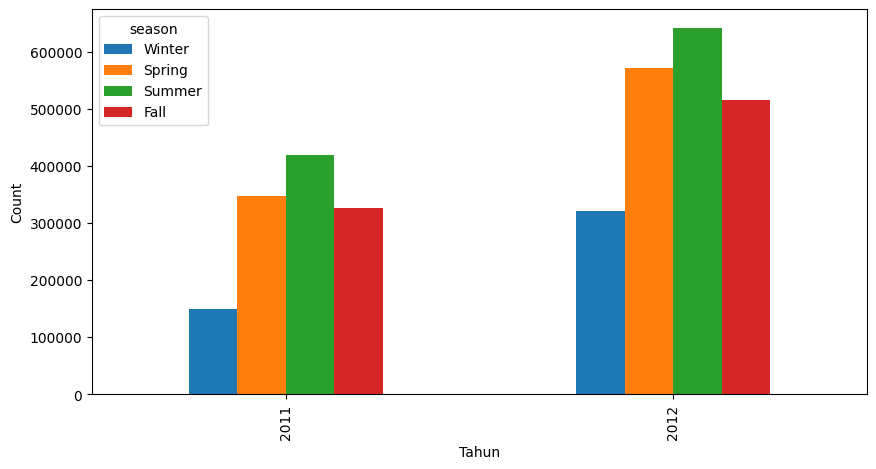

In [140]:
ax = by_season.plot(kind="bar", figsize=(10,5))
ax.set_xlabel('Tahun')
ax.set_ylabel('Count')

* Musim panas merupakan musim favorit penyewa sepeda, sedangkan musim dingin, penyewa sepeda tidak terlalu banyak. Hal itu terjadi baik pada tahun 2011 maupun 2012.
* Musim panas menjadi musim terbanyak penyewa, disusul musim semi, musim gugur, dan diurutan terkahir musim dingin.
* Tahun 2011 dan 2012 memiliki data yang mirip, namun jumlah data berbeda.
* Terjadi peningkatan pada jumlah penyewa disetiap musim pada tahun 2012.

### Pertanyaan 2: Apakah cuaca mempengaruhi order terhadap bike sharing?

Text(0, 0.5, 'Count')

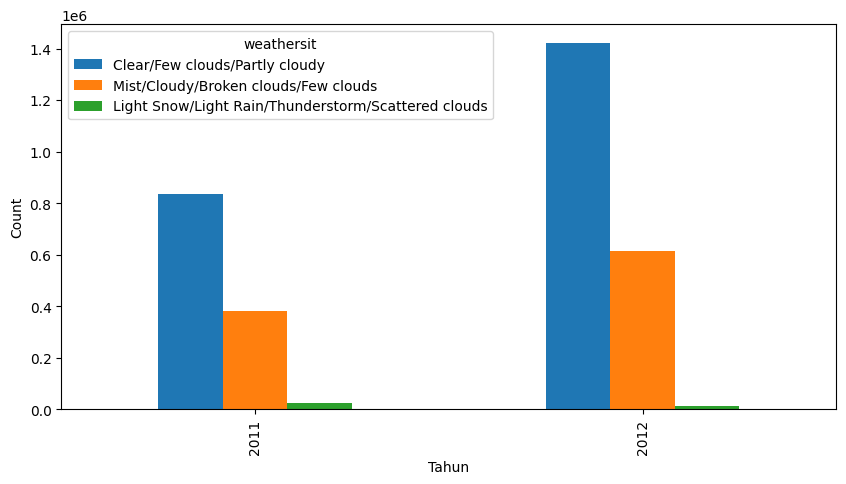

In [141]:
ax = by_weather.plot(kind="bar", figsize=(10,5))
ax.set_xlabel("Tahun")
ax.set_ylabel("Count")

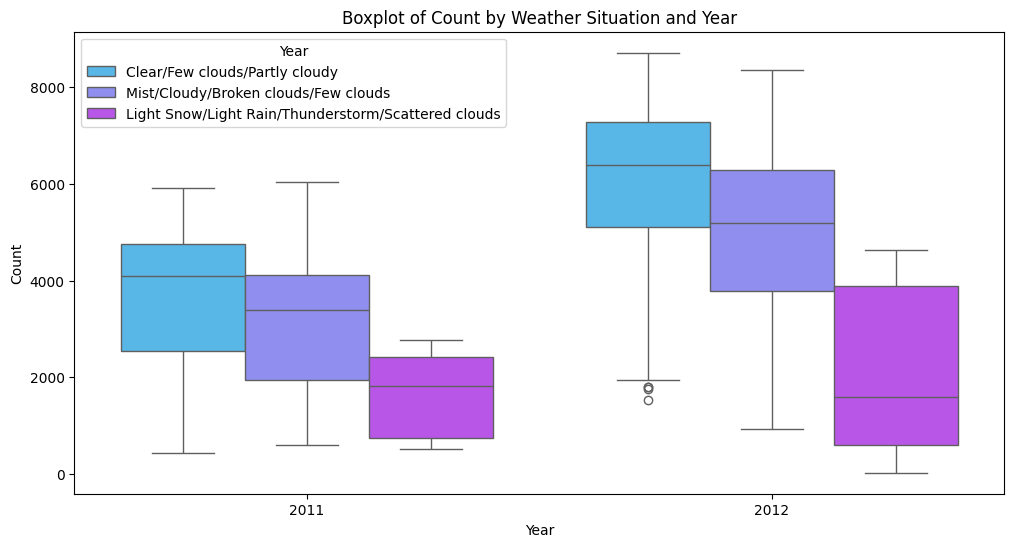

In [149]:
# Membuat boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='yr', y='cnt', hue='weathersit', data=df_day, palette = "cool")
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Boxplot of Count by Weather Situation and Year')
plt.legend(title='Year')
plt.show()

* Cuaca sangat mempengaruhi penyewaan sepeda, dapat dilihat terdapat perbedaan jauh pada cuaca cerah dengan cuaca salju ringan.
* Cuaca cerah menempati urutan pertama penyewa terbanyak, disusul berkabut, lalu salju ringan, dan hujan lebat tidak memiliki penyewa sama sekali
* Tahun 2011 dan 2012 memilik tren yang sama dilihat dari penyewaan sepeda.

## Conclusion

- **Kesimpulan pertanyaan 1**: Dilihat dari data dan juga visualisasinya, musim panas merupakan musim favorit bagi para penyewa sepeda, disusul musim semi, musim gugur, dan diurutan terakhir musim dingin. Musim panas menjadi musim favorit karena musim tersebut merupakan waktu libur bagi para pelajar, sehingga bermain sepeda dan mobilisasi menggunakan sepeda bisa menjadi alternatif untuk berpergian.
- **Kesimpulan pertanyaan 2**: Visualisasi yang sudah dibuat menjelaskan bahwa cuaca sangat mempengaruhi penentuan penyewaan sepeda. Cuaca cerah merupakan cuaca dengan penyewa terbanyak baik pada tahun 2011 maupun 2012. Diikuti dengan cuaca berkabut, dan salju ringan. Penyewaan berdasarkan cuaca memiliki kesamaan pola atau trean antara dua tahun tersebut. Sebagai tambahan, pada cuaca hujan lebat tidak memiliki penyewa sama sekali, karena cuaca ekstrem tersebut tidak memungkinkan untuk orang bersepeda.

# export csv


In [150]:
df_day.to_csv("main_data.csv", index=False)